In [118]:
import pandas as pd  # Data manipulation and CSV handling.
import csv    # Reading/writing CSV files.
import plotly.express as px  # Interactive visualizations. (new library has been used)
import seaborn as sns   # Data visualization (plots). (new library has been used)
import matplotlib.pyplot as plt # Plotting tool.
import psycopg2 # PostgreSQL database connection. ( new library has been used)
from sqlalchemy import create_engine  # Database query execution.
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
import numpy as np
import scipy.stats as st
from scipy.stats import zscore

In [120]:
# Load the CSV file into a DataFrame
data_origin = pd.read_csv("../Project-3-Group-2/Data/healthcare_dataset.csv")

# Open the CSV file and list the headers using CSV library
with open("../Project-3-Group-2/Data/healthcare_dataset.csv", mode='r') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Get the first row as headers

print(headers)

['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


In [4]:
# Get 1000 random rows
df = data_origin.sample(n=1000, random_state=1, replace=True)

#save these random rows to a new CSV file
df.to_csv('random_rows.csv', index=False)



In [5]:
# Standardize capitalisation
df['Name'] = df['Name'].str.title()
df['Doctor'] = df['Doctor'].str.title()
df['Hospital'] = df['Hospital'].str.title()
df['Medical Condition'] = df['Medical Condition'].str.capitalize()
df['Gender'] = df['Gender'].str.capitalize()
df['Test Results'] = df['Test Results'].str.capitalize()
df['Medication'] = df['Medication'].str.capitalize()

# Data type conversion
df['Age'] = df['Age'].astype(int)
df['Billing Amount'] = df['Billing Amount'].astype(float)
df['Room Number'] = df['Room Number'].astype(int)

# dropping missing values
df = df.dropna() 

#Standardize categorical data
df['Blood Type'] = df['Blood Type'].str.upper()
df['Admission Type'] = df['Admission Type'].str.capitalize()

# Removing titles from names 
df['Name'] = df['Name'].str.replace(r'\b(Dr\.?|Mrs\.?|Ms\.?|Mr\.?)\s*', '', regex=True)

# Remove duplicates
df = df.drop_duplicates()

first_10_records = df.head(10)
print(first_10_records)


                     Name  Age  Gender Blood Type Medical Condition  \
33003         Jon Proctor   58  Female         A-          Diabetes   
12172    Michelle Roberts   28  Female         B-            Asthma   
5192   Robert Daniels Jr.   78    Male         A+         Arthritis   
32511       Glenn Estrada   33  Female         B-         Arthritis   
50057        Brenda Davis   42  Female         B-            Cancer   
43723       Mackenzie Cox   48  Female         B+            Cancer   
7813         Michael Kemp   51  Female        AB+          Diabetes   
52047        April Reeves   65    Male         O-          Diabetes   
21440          Dawn Avila   64    Male         O-      Hypertension   
32912        Jonathan Lee   27  Female         B-            Cancer   

      Date of Admission            Doctor                      Hospital  \
33003        2023-02-18      James Nelson                Griffin-Foster   
12172        2020-09-04         Lisa Hess      Walker Blake, And Hug

In [6]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [7]:
# Ensure all values in 'Name' are strings
df['Name'] = df['Name'].astype(str)

# Function to split names
def split_name(name):
    parts = name.split(' ', 1)
    first_name = parts[0]
    last_name = parts[1] if len(parts) > 1 else None
    return pd.Series([first_name, last_name])

# Apply the function to the 'Name' column and create 'First_name' and 'Last_name' columns
df[['First_name', 'Last_name']] = df['Name'].apply(split_name)

# Display the first few rows to check the result
print(df.head())

                     Name  Age  Gender Blood Type Medical Condition  \
33003         Jon Proctor   58  Female         A-          Diabetes   
12172    Michelle Roberts   28  Female         B-            Asthma   
5192   Robert Daniels Jr.   78    Male         A+         Arthritis   
32511       Glenn Estrada   33  Female         B-         Arthritis   
50057        Brenda Davis   42  Female         B-            Cancer   

      Date of Admission           Doctor                  Hospital  \
33003        2023-02-18     James Nelson            Griffin-Foster   
12172        2020-09-04        Lisa Hess  Walker Blake, And Hughes   
5192         2022-11-22  Nicholas Graves             Robles-Fisher   
32511        2021-05-25  Matthew Goodman            Nixon Sons And   
50057        2021-03-16      Eric Hudson                Curtis Plc   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
33003              Cigna    19092.692951          491       Elective   
12172   

In [8]:
# Drop column 'Name'
df.drop(columns=['Name'], inplace=True)

print(df.head())

       Age  Gender Blood Type Medical Condition Date of Admission  \
33003   58  Female         A-          Diabetes        2023-02-18   
12172   28  Female         B-            Asthma        2020-09-04   
5192    78    Male         A+         Arthritis        2022-11-22   
32511   33  Female         B-         Arthritis        2021-05-25   
50057   42  Female         B-            Cancer        2021-03-16   

                Doctor                  Hospital Insurance Provider  \
33003     James Nelson            Griffin-Foster              Cigna   
12172        Lisa Hess  Walker Blake, And Hughes           Medicare   
5192   Nicholas Graves             Robles-Fisher              Aetna   
32511  Matthew Goodman            Nixon Sons And           Medicare   
50057      Eric Hudson                Curtis Plc              Cigna   

       Billing Amount  Room Number Admission Type Discharge Date   Medication  \
33003    19092.692951          491       Elective     2023-03-14      Aspirin

In [9]:
print(df.columns)


Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results', 'First_name', 'Last_name'],
      dtype='object')


In [10]:
# Desired column order
new_order = [
    'First_name', 'Last_name', 'Age', 'Gender', 'Blood Type', 
    'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 
    'Insurance Provider', 'Billing Amount', 'Room Number', 
    'Admission Type', 'Discharge Date', 'Medication', 'Test Results'
]

# Reorder columns
df = df[new_order]

print(df.head())

      First_name    Last_name  Age  Gender Blood Type Medical Condition  \
33003        Jon      Proctor   58  Female         A-          Diabetes   
12172   Michelle      Roberts   28  Female         B-            Asthma   
5192      Robert  Daniels Jr.   78    Male         A+         Arthritis   
32511      Glenn      Estrada   33  Female         B-         Arthritis   
50057     Brenda        Davis   42  Female         B-            Cancer   

      Date of Admission           Doctor                  Hospital  \
33003        2023-02-18     James Nelson            Griffin-Foster   
12172        2020-09-04        Lisa Hess  Walker Blake, And Hughes   
5192         2022-11-22  Nicholas Graves             Robles-Fisher   
32511        2021-05-25  Matthew Goodman            Nixon Sons And   
50057        2021-03-16      Eric Hudson                Curtis Plc   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
33003              Cigna    19092.692951          491   

In [11]:
# Convert date columns to ISO 8601 format (YYYY-MM-DD)
df['Date of Admission'] = pd.to_datetime(df['Date of Admission']).dt.strftime('%Y-%m-%d')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date']).dt.strftime('%Y-%m-%d')

# Display the first few rows to check the result
print(df.head())

      First_name    Last_name  Age  Gender Blood Type Medical Condition  \
33003        Jon      Proctor   58  Female         A-          Diabetes   
12172   Michelle      Roberts   28  Female         B-            Asthma   
5192      Robert  Daniels Jr.   78    Male         A+         Arthritis   
32511      Glenn      Estrada   33  Female         B-         Arthritis   
50057     Brenda        Davis   42  Female         B-            Cancer   

      Date of Admission           Doctor                  Hospital  \
33003        2023-02-18     James Nelson            Griffin-Foster   
12172        2020-09-04        Lisa Hess  Walker Blake, And Hughes   
5192         2022-11-22  Nicholas Graves             Robles-Fisher   
32511        2021-05-25  Matthew Goodman            Nixon Sons And   
50057        2021-03-16      Eric Hudson                Curtis Plc   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
33003              Cigna    19092.692951          491   

In [12]:
# Save the updated DataFrame to a new CSV file
df.to_csv('cleaned_healthcare_dataset.csv', index=False)

In [13]:
# This part of code generates and saves patient, admission, medication, and test results data into four separate CSV files.

# Generate PatientID as a unique identifier for each patient
df['PatientID'] = range(1, len(df) + 1)

# Patient Table
# Create a DataFrame with relevant patient information and save to a CSV file
patient_df = df[['PatientID', 'First_name', 'Last_name', 'Age', 'Gender', 'Blood Type', 'Medical Condition']]
patient_df.to_csv('Patient_Table.csv', index=False)

# Generate AdmissionID as a unique identifier for each admission
df['AdmissionID'] = range(1, len(df) + 1)

# Admission Table
# Create a DataFrame with admission-related information, linking it to the PatientID, and save to a CSV file
admission_df = df[['AdmissionID', 'PatientID', 'Date of Admission', 'Doctor', 'Hospital', 
                   'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date']]
admission_df.to_csv('Admission_Table.csv', index=False)

# Medication Table
# Generate a unique MedicationID for each entry
medication_df = df[['AdmissionID', 'Medication']].copy()  
medication_df.loc[:, 'MedicationID'] = range(1, len(medication_df) + 1)  # Use .loc to set values

# Save the Medication table to a CSV file
medication_df[['MedicationID', 'AdmissionID', 'Medication']].to_csv('Medication_Table.csv', index=False)

# Test Results Table
# Generate a unique TestResultID for each entry
test_results_df = df[['AdmissionID', 'Test Results']].copy()  
test_results_df.loc[:, 'TestResultID'] = range(1, len(test_results_df) + 1)  

# Save the Test Results table to a CSV file
test_results_df[['TestResultID', 'AdmissionID', 'Test Results']].to_csv('Test_Results_Table.csv', index=False)


print("CSV files created: Patient_Table.csv, Admission_Table.csv, Medication_Table.csv, Test_Results_Table.csv")


CSV files created: Patient_Table.csv, Admission_Table.csv, Medication_Table.csv, Test_Results_Table.csv


In [19]:
# This code establishes a connection to a PostgreSQL database using the provided parameters,
# tests the connection by retrieving the database version, and then closes the connection.


# Define connection parameters
conn_params = {
    'dbname': 'healthcare',
    'user': 'postgres',
    'password': 'Ab123456',
    'host': 'bootcamp.postgres.database.azure.com',  
    'port': '5432'        
}

try:
    # Establish the connection
    conn = psycopg2.connect(**conn_params)
    
    # Create a cursor object
    cursor = conn.cursor()

    # Test the connection
    cursor.execute("SELECT version();")
    db_version = cursor.fetchone()
    print(f"Connected to database. Version: {db_version}")

    # Close the cursor and connection
    cursor.close()
    conn.close()
except Exception as e:
    print(f"Error: {e}")

Connected to database. Version: ('PostgreSQL 16.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 11.2.0, 64-bit',)


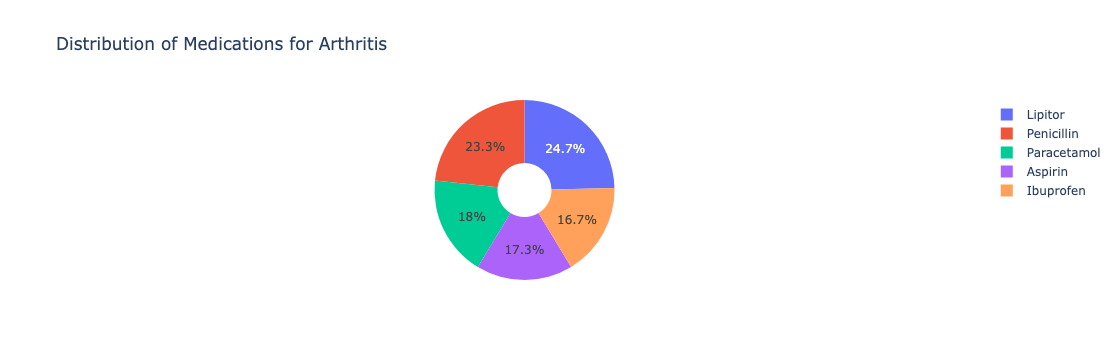

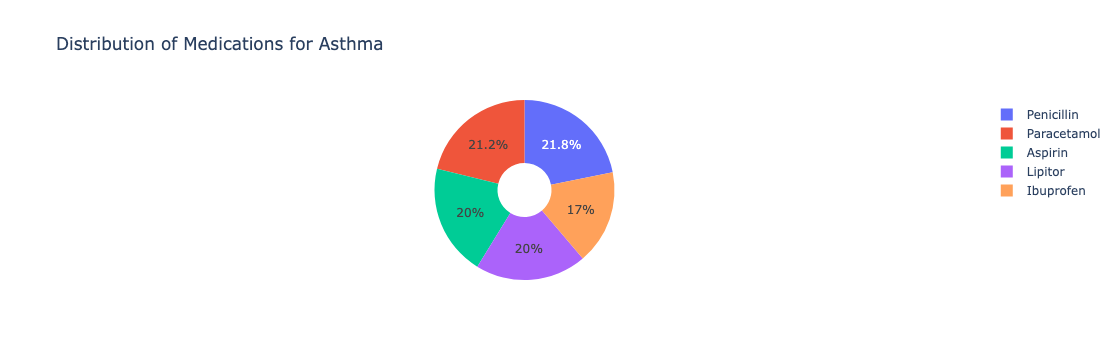

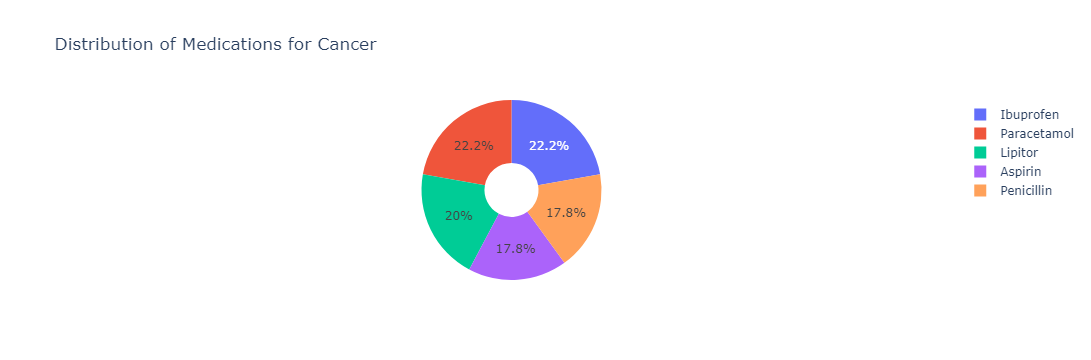

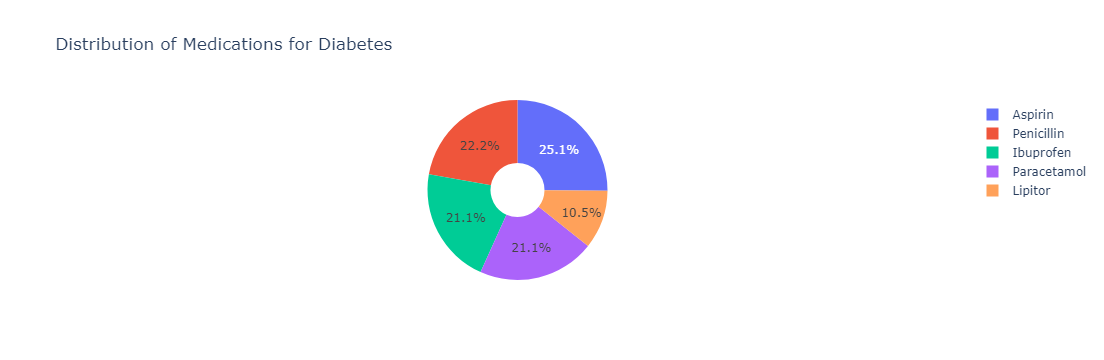

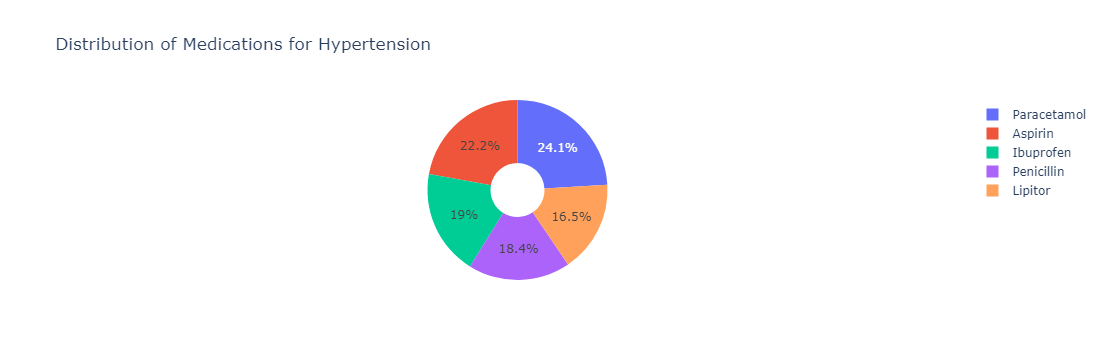

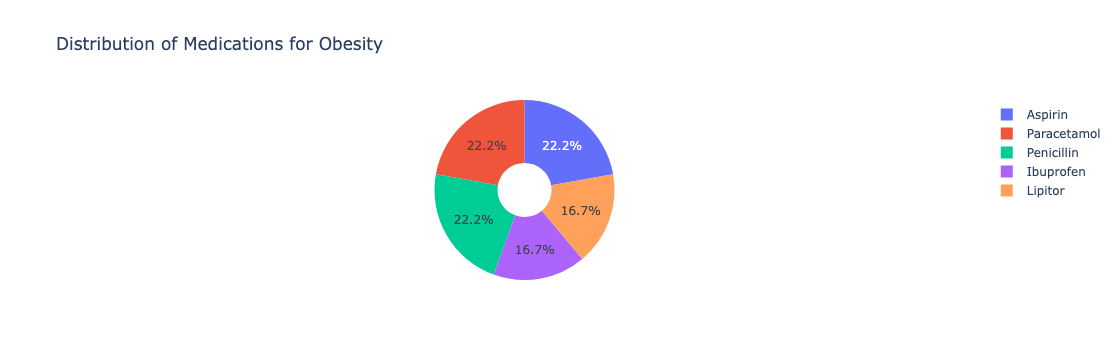

In [20]:
#What is the distribution of medication types across different medical conditions?

# Define connection parameters
conn_params = {
    'dbname': 'healthcare',
    'user': 'postgres',
    'password': 'Ab123456',
    'host': 'bootcamp.postgres.database.azure.com',
    'port': '5432'
}

# Create the connection string manually to handle special characters
# URL encoding the password if it contains special characters
password = conn_params['password'].replace('@', '%40')
engine = create_engine(f'postgresql+psycopg2://{conn_params["user"]}:{password}@{conn_params["host"]}:{conn_params["port"]}/{conn_params["dbname"]}')

# Read data from the database into a DataFrame
query = """
SELECT pt."Medical_Condition", mt."Medication"
FROM "Medication_Table" mt
JOIN "Admission_Table" at ON mt."AdmissionID" = at."AdmissionID"
JOIN "Patient_Table" pt ON at."PatientID" = pt."PatientID";
"""

df2 = pd.read_sql(query, engine)

# Group by 'Medical Condition' and 'Medication', then count occurrences
med_condition_distribution = df2.groupby(['Medical_Condition', 'Medication']).size().reset_index(name='Count')

# Loop to create an interactive pie chart for each medical condition
for condition in med_condition_distribution['Medical_Condition'].unique():
    # Filter data for the specific condition
    condition_data = med_condition_distribution[med_condition_distribution['Medical_Condition'] == condition]
    
    # Create an interactive pie chart using Plotly
    fig = px.pie(condition_data, values='Count', names='Medication', title=f'Distribution of Medications for {condition}', hole=0.3)
    
    # Show the plot
    fig.show()

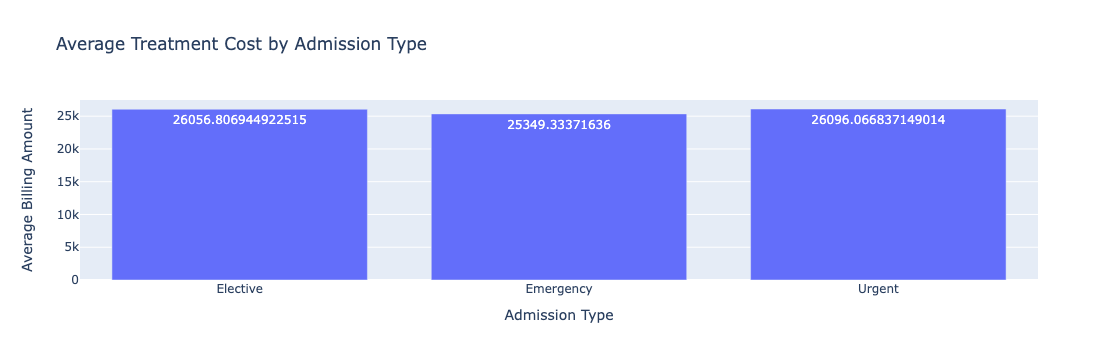

In [17]:
#How does the cost of treatment vary with different admission types?

# Define connection parameters
conn_params = {
    'dbname': 'healthcare',
    'user': 'postgres',
    'password': 'Ab123456',
    'host': 'bootcamp.postgres.database.azure.com',
    'port': '5432'
}

# URL encoding the password if it contains special characters
password = conn_params['password'].replace('@', '%40')
engine = create_engine(f'postgresql+psycopg2://{conn_params["user"]}:{password}@{conn_params["host"]}:{conn_params["port"]}/{conn_params["dbname"]}')

# Read data from the database into a DataFrame
query = """
SELECT "Admission_Type", "Billing_Amount"
FROM "Admission_Table";
"""

df3 = pd.read_sql(query, engine)

# Group by 'Admission_Type' and calculate average billing amount
cost_by_admission_type = df3.groupby('Admission_Type')['Billing_Amount'].mean().reset_index()

# Create a bar chart to visualize the cost variation
fig = px.bar(cost_by_admission_type, x='Admission_Type', y='Billing_Amount',
             title='Average Treatment Cost by Admission Type',
             labels={'Billing_Amount': 'Average Billing Amount', 'Admission_Type': 'Admission Type'},
             text='Billing_Amount')  # Ensure this column exists in your DataFrame

# Show the plot
fig.show()

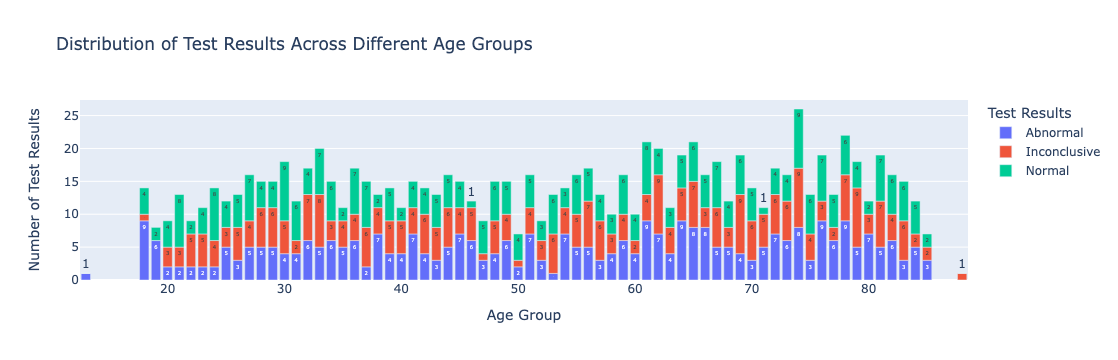

In [18]:
#What is the distribution of test results across different age groups?

# Define connection parameters
conn_params = {
    'dbname': 'healthcare',
    'user': 'postgres',
    'password': 'Ab123456',
    'host': 'bootcamp.postgres.database.azure.com',
    'port': '5432'
}

# URL encoding the password if it contains special characters
password = conn_params['password'].replace('@', '%40')
engine = create_engine(f'postgresql+psycopg2://{conn_params["user"]}:{password}@{conn_params["host"]}:{conn_params["port"]}/{conn_params["dbname"]}')

# Read data from the database into a DataFrame
query = """
SELECT pt."Age", tr."Test_Results"
FROM "Test_Results_Table" tr
JOIN "Admission_Table" at ON tr."AdmissionID" = at."AdmissionID"
JOIN "Patient_Table" pt ON at."PatientID" = pt."PatientID";
"""

df4 = pd.read_sql(query, engine)

# Group by 'Age' and 'Test Results', then count occurrences
age_test_distribution = df4.groupby(['Age', 'Test_Results']).size().reset_index(name='Count')

# Create a pivot table for stacked bar chart
pivot_table = age_test_distribution.pivot(index='Age', columns='Test_Results', values='Count').fillna(0)

# Reset index to use 'Age' as a column
pivot_table.reset_index(inplace=True)

# Melt the pivot table for Plotly compatibility
melted_df = pivot_table.melt(id_vars='Age', var_name='Test Results', value_name='Count')

# Create the interactive stacked bar chart
fig = px.bar(melted_df, x='Age', y='Count', color='Test Results', 
             title='Distribution of Test Results Across Different Age Groups',
             labels={'Count': 'Number of Test Results', 'Age': 'Age Group'},
             text='Count')

# Show the plot
fig.show()

In [61]:
# What is the distribution of medical conditions among different age groups?
# Define age group bins (e.g., 0-18, 19-35, 36-60, 60+)
age_bins = [0,10,20,30,40,50,60,70,80,90,100]
age_labels = ['0-10','11-20','21-30','31-40','41-50', '51-60','61-70','71-80','81-90','90+']

In [62]:
# Create a new column for age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df.head()

,First_name,Last_name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,PatientID,AdmissionID,Age_Group
33003,Jon,Proctor,58,Female,A-,Diabetes,2023-02-18,James Nelson,Griffin-Foster,Cigna,19092.692951,491,Elective,2023-03-14,Aspirin,Inconclusive,1,1,51-60
12172,Michelle,Roberts,28,Female,B-,Asthma,2020-09-04,Lisa Hess,"Walker Blake, And Hughes",Medicare,11346.545701,216,Urgent,2020-09-27,Paracetamol,Inconclusive,2,2,21-30
5192,Robert,Daniels Jr.,78,Male,A+,Arthritis,2022-11-22,Nicholas Graves,Robles-Fisher,Aetna,37084.986334,257,Emergency,2022-12-15,Penicillin,Normal,3,3,71-80
32511,Glenn,Estrada,33,Female,B-,Arthritis,2021-05-25,Matthew Goodman,Nixon Sons And,Medicare,45310.630922,388,Emergency,2021-06-17,Ibuprofen,Normal,4,4,31-40
50057,Brenda,Davis,42,Female,B-,Cancer,2021-03-16,Eric Hudson,Curtis Plc,Cigna,36569.665156,268,Emergency,2021-04-09,Lipitor,Abnormal,5,5,41-50


In [63]:
# Group by 'Age_Group' and 'Medical_Condition' to get the distribution
age_condition_distribution = df.groupby(['Age_Group', 'Medical Condition']).size().unstack(fill_value=0)


C:\Users\61433\AppData\Local\Temp\ipykernel_34588\2250056737.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



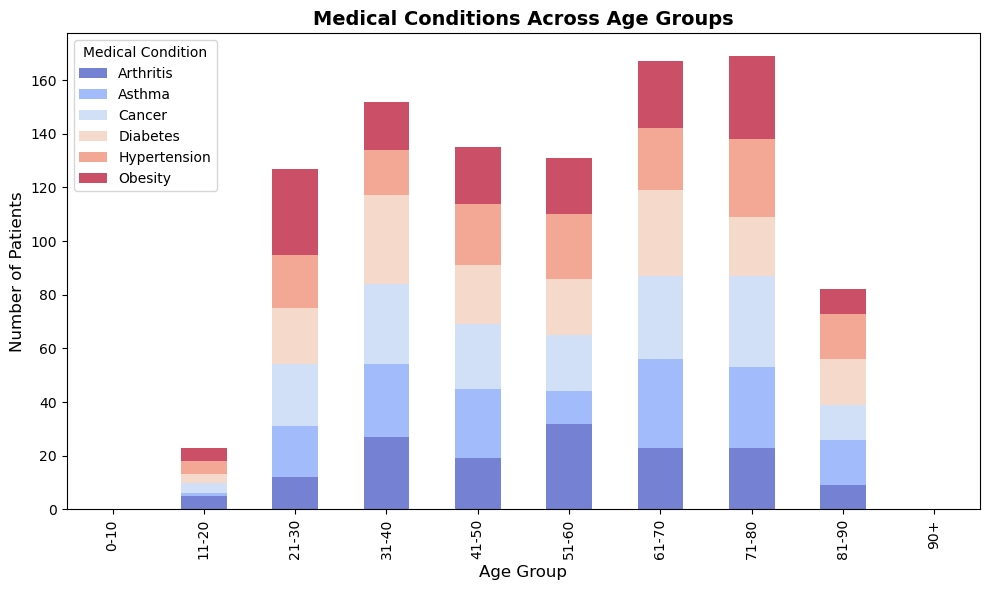

In [64]:
# Choose a cool seaborn color palette (e.g., 'coolwarm' or 'viridis')
sns.set_palette("coolwarm")
# Plot stacked bar chart with seaborn's color palette
age_condition_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', alpha=0.7)
# Add labels and title
plt.title('Medical Conditions Across Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
# Customize legend position
plt.legend(title='Medical Condition',loc='upper left')

# Apply tight layout and display
plt.tight_layout()
plt.show()

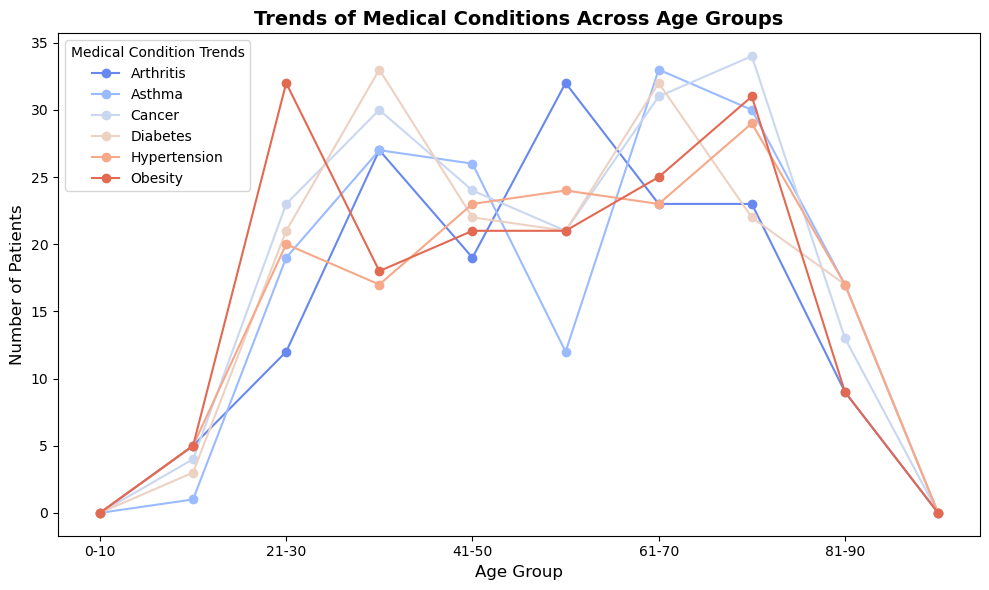

In [65]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Plot a line for each medical condition
age_condition_distribution.plot(kind='line', marker='o', ax=ax)
# Add legend, title, and labels
ax.legend(title='Medical Condition Trends', loc='upper left')
ax.set_title('Trends of Medical Conditions Across Age Groups', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Number of Patients', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [66]:
# What are the proportions of different admission types (Emergency, Elective, Urgent)?
# Count occurrences of each admission type
admission_type_counts = df["Admission Type"].value_counts()

In [67]:
# Calculate proportions by dividing each count by the total number of admissions
admission_type_proportions = admission_type_counts / admission_type_counts.sum()

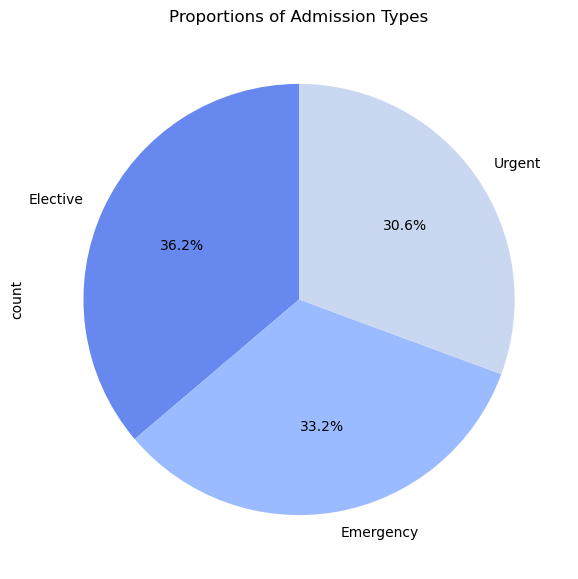

In [68]:
# Plot pie chart for proportions of admission types
plt.figure(figsize=(7, 7))
admission_type_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90,legend=False)
plt.title('Proportions of Admission Types')
plt.show()

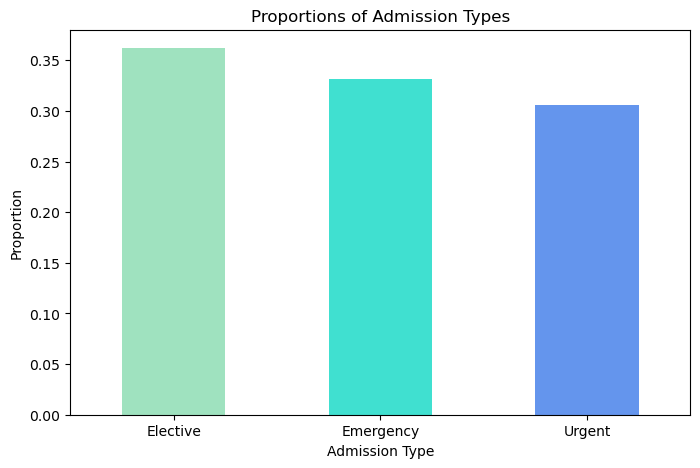

In [69]:
# bar chart for proportions of admission types
admission_type_proportions.plot(kind='bar', color=['#9FE2BF', '#40E0D0', '#6495ED'], figsize=(8, 5))
plt.title('Proportions of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [70]:
# What trends can be observed in test results over time?
# formatting the data of admission
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [28]:
#create a new column about admission duration days
df['Admission_Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df.head()

,First_name,Last_name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,PatientID,AdmissionID,Age_Group,Admission_Duration
33003,Jon,Proctor,58,Female,A-,Diabetes,2023-02-18,James Nelson,Griffin-Foster,Cigna,19092.692951,491,Elective,2023-03-14,Aspirin,Inconclusive,1,1,51-60,24
12172,Michelle,Roberts,28,Female,B-,Asthma,2020-09-04,Lisa Hess,"Walker Blake, And Hughes",Medicare,11346.545701,216,Urgent,2020-09-27,Paracetamol,Inconclusive,2,2,21-30,23
5192,Robert,Daniels Jr.,78,Male,A+,Arthritis,2022-11-22,Nicholas Graves,Robles-Fisher,Aetna,37084.986334,257,Emergency,2022-12-15,Penicillin,Normal,3,3,71-80,23
32511,Glenn,Estrada,33,Female,B-,Arthritis,2021-05-25,Matthew Goodman,Nixon Sons And,Medicare,45310.630922,388,Emergency,2021-06-17,Ibuprofen,Normal,4,4,31-40,23
50057,Brenda,Davis,42,Female,B-,Cancer,2021-03-16,Eric Hudson,Curtis Plc,Cigna,36569.665156,268,Emergency,2021-04-09,Lipitor,Abnormal,5,5,41-50,24


In [71]:
df['Test Results'].unique()

array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)

In [72]:
le = LabelEncoder()
df['Test Results'] = le.fit_transform(df['Test Results'])

In [94]:
df.columns

Index(['First_name', 'Last_name', 'Age', 'Gender', 'Blood Type',
       'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results', 'PatientID',
       'AdmissionID', 'Age_Group', 'Month', 'Month_Year', 'Length of Stay'],
      dtype='object')

In [95]:
# Group by month
df['Month'] = df['Date of Admission'].dt.to_period('M')

# Calculate statistics per month
monthly_stats = df.groupby('Month').agg({
    'Length of Stay': 'mean',
    'Test Results': lambda x: LabelEncoder().fit_transform(x).mean() 
}).reset_index()

# Convert 'Month' back to datetime for plotting
monthly_stats['Month'] = monthly_stats['Month'].dt.to_timestamp()

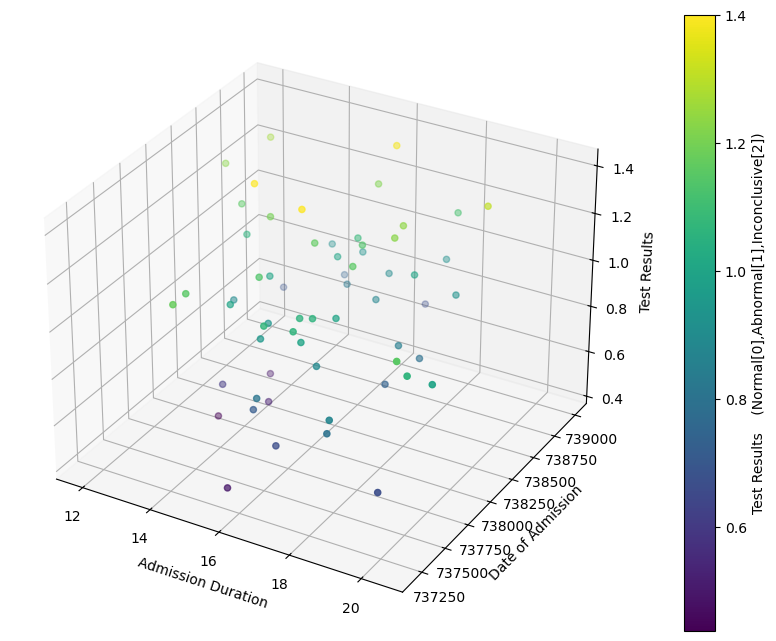

In [32]:
# Create 3D plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(monthly_stats['Admission_Duration'], 
                     monthly_stats['Month'].map(pd.Timestamp.toordinal), 
                     monthly_stats['Test Results'], 
                     c=monthly_stats['Test Results'], cmap='viridis', marker='o')

# Set labels
ax.set_xlabel('Admission Duration')
ax.set_ylabel('Date of Admission')
ax.set_zlabel('Test Results')

# Show color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Test Results    (Normal[0],Abnormal[1],Inconclusive[2])')

# Display plot
plt.show()

In [74]:
# check the frequency of test results (Normal[0], Abnormal[1], Inconclusive[2])
test_results_counts = df['Test Results'].value_counts()
test_results_counts

Test Results
0    343
2    328
1    315
Name: count, dtype: int64

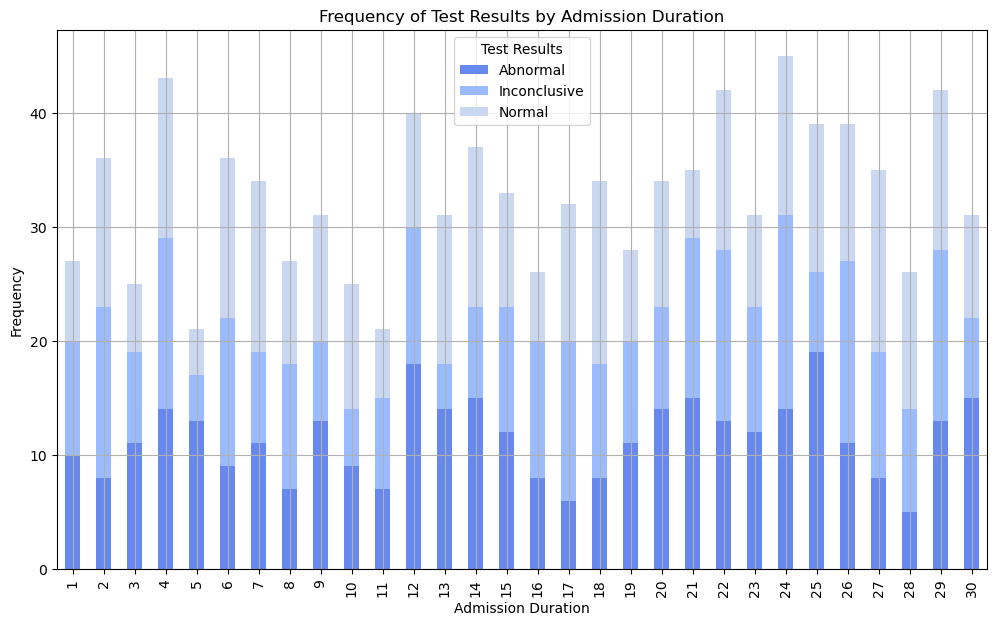

In [97]:
grouped = df.groupby(['Length of Stay', 'Test Results']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Admission Duration')
plt.ylabel('Frequency')
plt.title('Frequency of Test Results by Admission Duration')
plt.legend(title='Test Results', labels=le.classes_)
plt.grid(True)
plt.show()

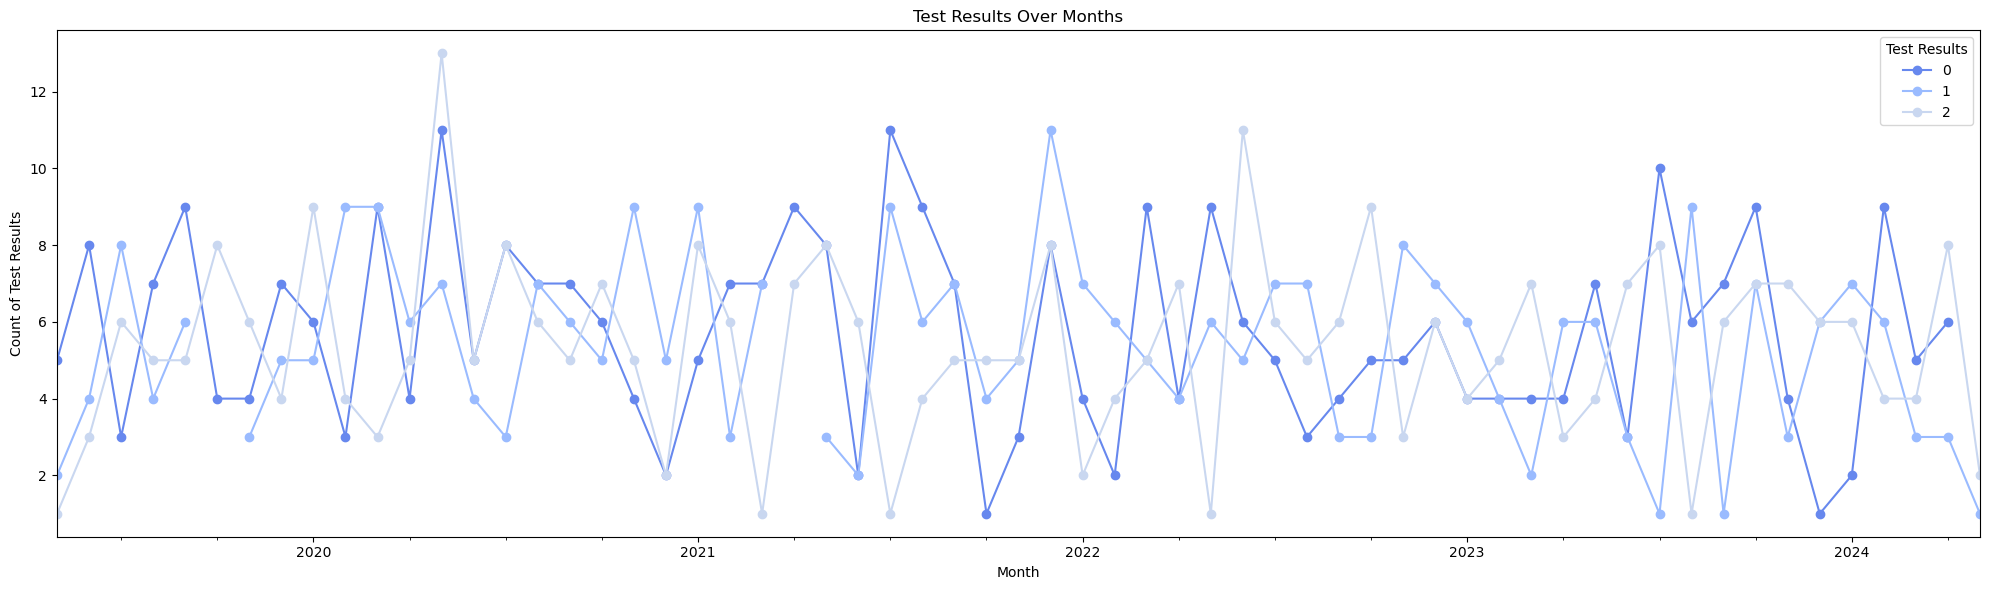

In [98]:
df['Month_Year'] = df['Date of Admission'].dt.to_period('M')
grouped_by_month = df.groupby(['Month_Year', 'Test Results']).size().unstack()
grouped_by_month = grouped_by_month.sort_index()
plt.figure(figsize=(20, 6))
grouped_by_month.plot(kind='line', marker='o',ax=plt.gca())

plt.title('Test Results Over Months')
plt.xlabel('Month')
plt.ylabel('Count of Test Results')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

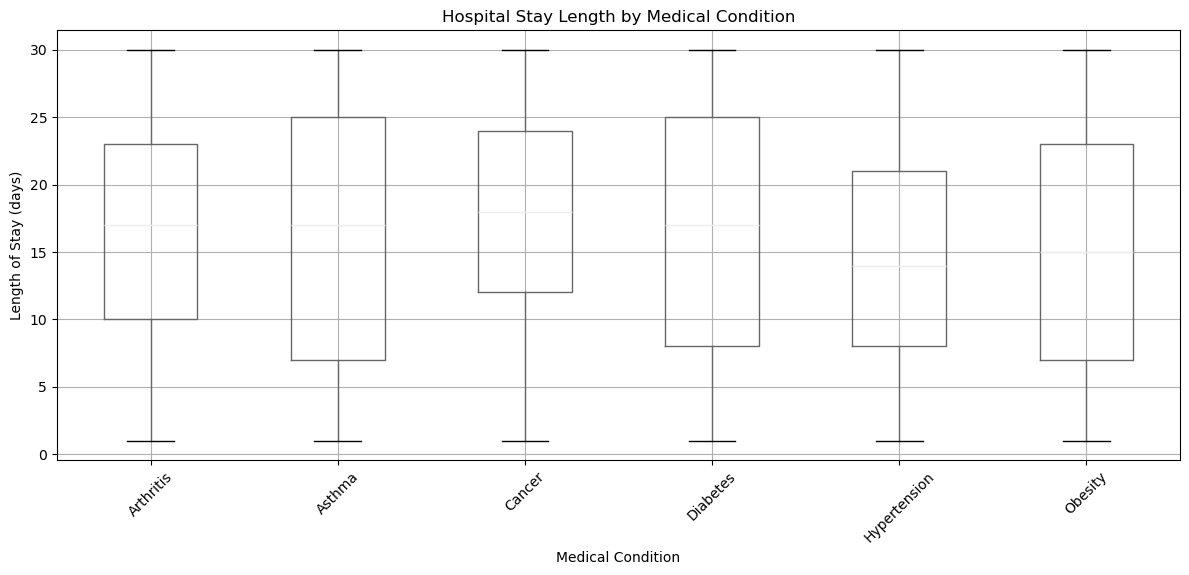

  Medical Condition  min  max  median       mean       std
0         Arthritis    1   30    17.0  16.113333  8.018884
1            Asthma    1   30    17.0  16.369697  9.183910
2            Cancer    1   30    18.0  17.222222  8.387644
3          Diabetes    1   30    17.0  16.204678  9.121351
4      Hypertension    1   30    14.0  14.518987  8.103409
5           Obesity    1   30    15.0  15.679012  9.004246


In [76]:
#- How does the length of hospital stay vary by medical condition?
#Visualization: Box plot or bar chart.(Kajal)
#To analyze how the length of hospital stay varies by medical condition, we'll need to calculate the length of stay
#for each patient and then group this information by medical condition.
# Calculate length of stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
# Group by Medical Condition and calculate statistics
grp_Med_con = df.groupby('Medical Condition')['Length of Stay'].agg(['min', 'max', 'median', 'mean', 'std']).reset_index()
# Create a box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='Length of Stay', by='Medical Condition', figsize=(12, 6))
plt.title('Hospital Stay Length by Medical Condition')
plt.suptitle('')  # This removes the automatic suptitle added by pandas
plt.ylabel('Length of Stay (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Print summary statistics
print(grp_Med_con)

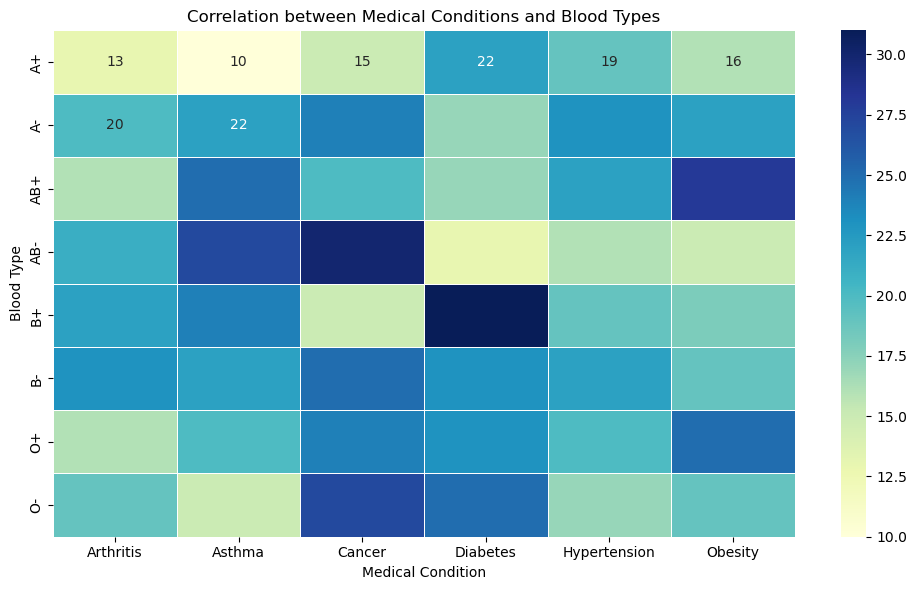

In [38]:
# How do different blood types correlate with medical conditions?
#Visualization: Heatmap or stacked bar chart.(Kajal)
# Create a pivot table to count the occurrences of each Medical Condition by Blood Type
pivot_table = df.pivot_table(index='Blood Type', columns='Medical Condition', aggfunc='size', fill_value=0)
#The pivot_table() function creates a matrix where rows are blood types and columns
#are medical conditions, with each cell showing the count of how often that blood type has that condition.
plt.figure(figsize=(10, 6))
# Create the heatmap
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=0.5)
#sns.heatmap() visualizes this table as a heatmap. The annot=True argument shows the count values in the cells.
# Customize the heatmap
plt.title('Correlation between Medical Conditions and Blood Types')
plt.ylabel('Blood Type')
plt.xlabel('Medical Condition')
# Show the plot
plt.tight_layout()
plt.show()

In [40]:
df.columns

Index(['First_name', 'Last_name', 'Age', 'Gender', 'Blood Type',
       'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results', 'PatientID',
       'AdmissionID', 'Age_Group', 'Admission_Duration', 'Month', 'Month_Year',
       'Length of Stay'],
      dtype='object')

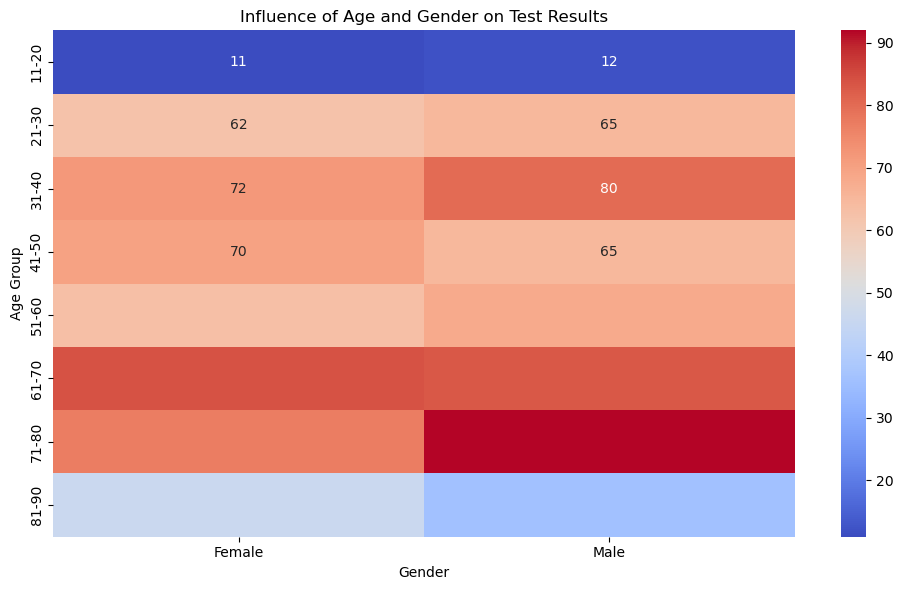

In [77]:
#- How do patient demographics (age, gender) influence the types of test results?
#Visualization: Heatmap or grouped bar chart. (Kajal)
# Pivot the data for heatmap visualization
pivot_table = df.pivot_table(index='Age_Group', columns='Gender', values='Test Results', aggfunc=lambda x: x.count())
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt='g')
# Customize the chart
plt.title('Influence of Age and Gender on Test Results')
plt.ylabel('Age Group')
plt.xlabel('Gender')
plt.tight_layout()
# Show the plot
plt.show()

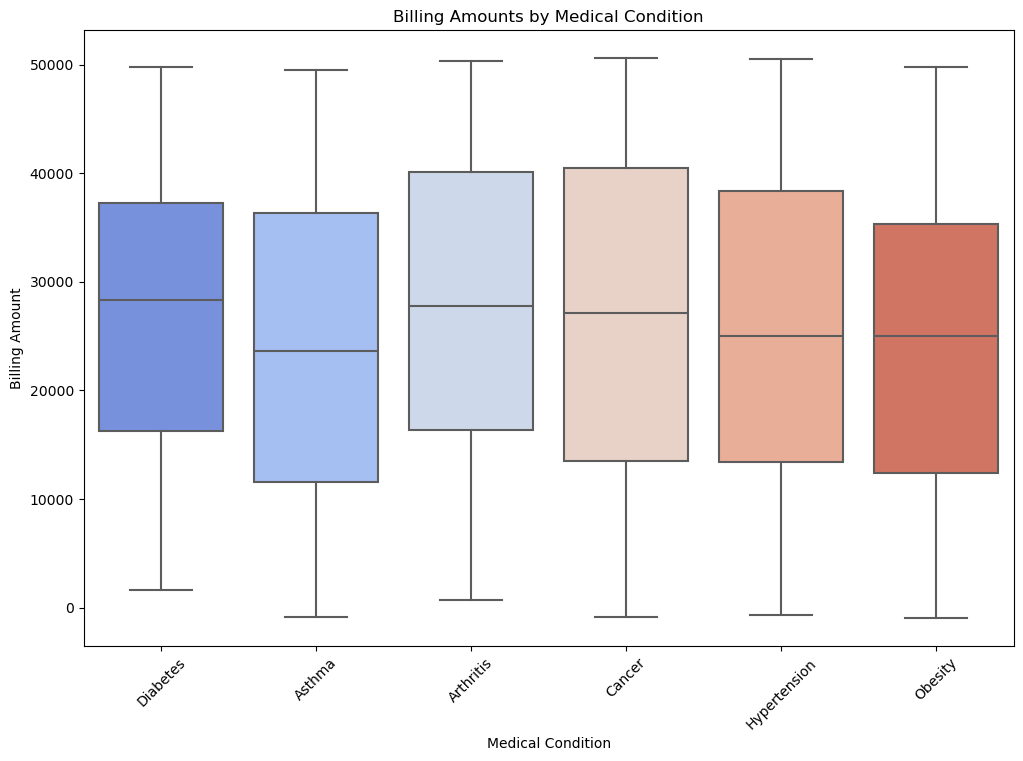

In [78]:
# How do billing amounts vary across different medical conditions?
# Merge the patient and admission data on PatientID
merged_df = pd.merge(patient_df, admission_df, on='PatientID')



# Create a box plot for billing amounts by medical condition
plt.figure(figsize=(12, 8))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=merged_df)
plt.title('Billing Amounts by Medical Condition')
plt.xticks(rotation=45)
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.show()

In [91]:
df.columns


Index(['First_name', 'Last_name', 'Age', 'Gender', 'Blood Type',
       'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results', 'PatientID',
       'AdmissionID', 'Age_Group', 'Month', 'Month_Year', 'Length of Stay'],
      dtype='object')

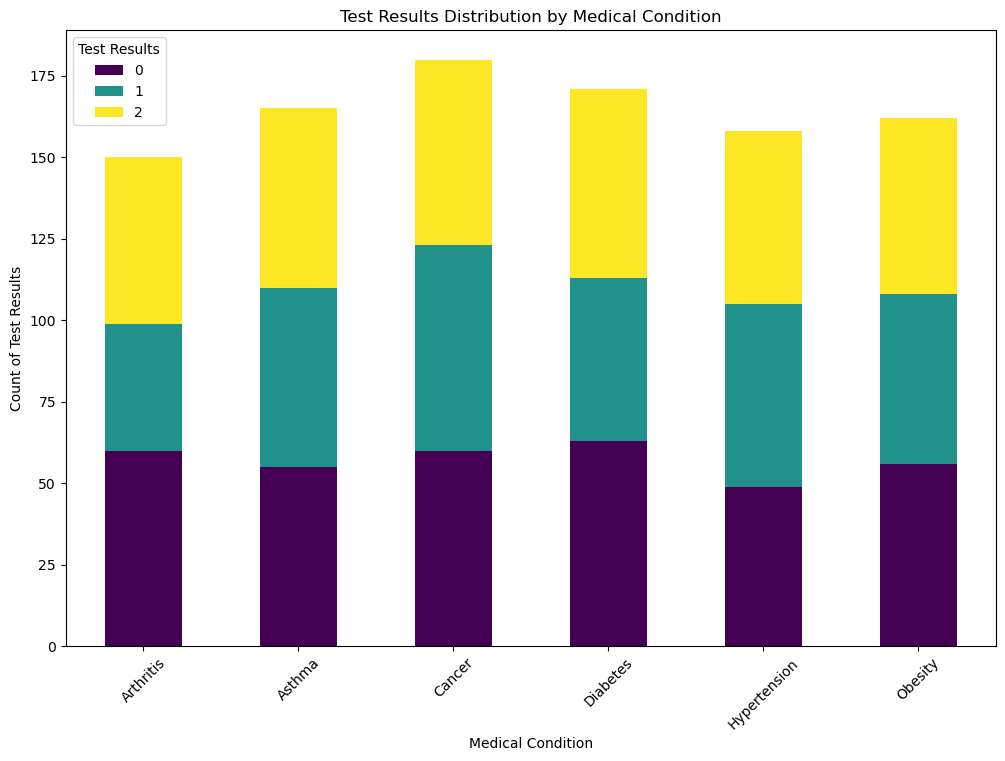

In [101]:
# How do test results (Normal, Abnormal, Inconclusive) vary by medical condition?
# Create a grouped DataFrame with counts of each test result per medical condition
test_results_count = df.groupby(['Medical Condition', 'Test Results']).size().unstack()

# Plot a stacked bar chart
test_results_count.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Test Results Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Count of Test Results')
plt.xticks(rotation=45)
plt.legend(title='Test Results')
plt.show()

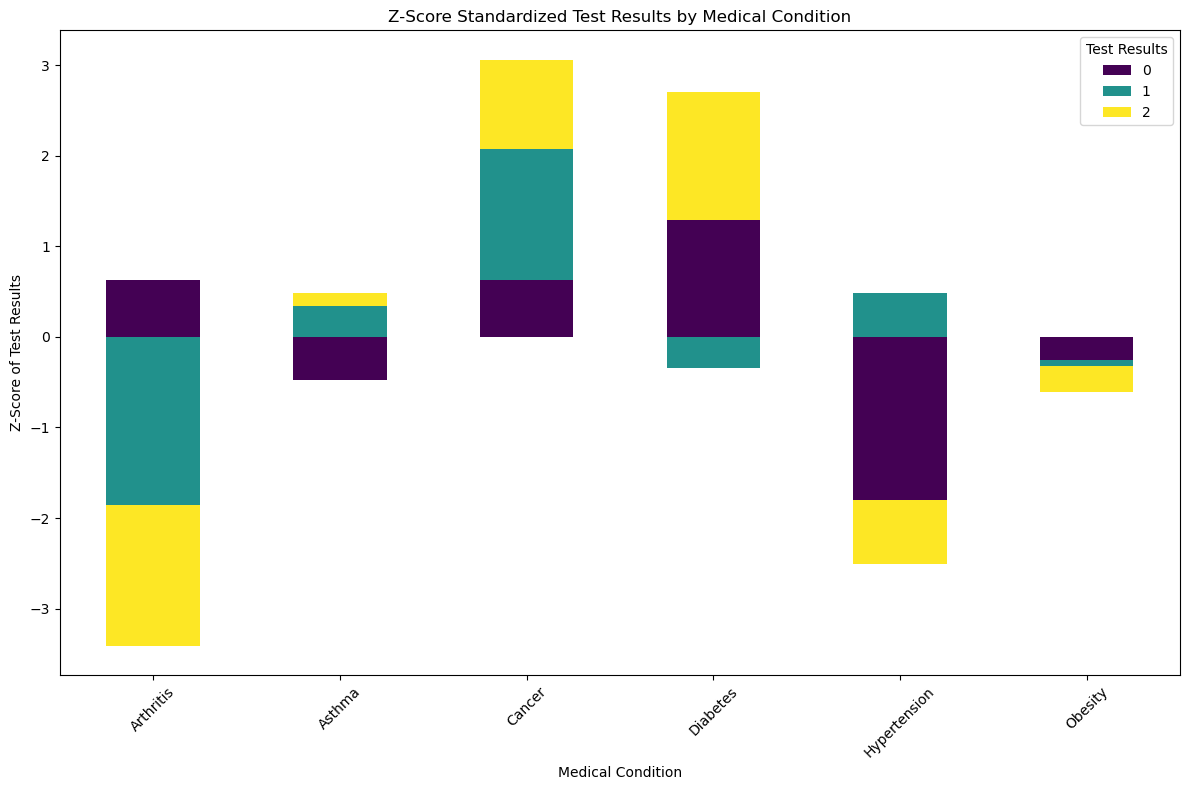

In [122]:

# Apply z-score standardization to the test results count data
standardized_zscore = test_results_count.apply(zscore)

# Plot a stacked bar chart with z-scores
standardized_zscore.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Customize the chart
plt.title('Z-Score Standardized Test Results by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Z-Score of Test Results')
plt.xticks(rotation=45)
plt.legend(title='Test Results')
plt.tight_layout()

plt.savefig('Output_images/test_results_medical')
# Show the plot
plt.show()

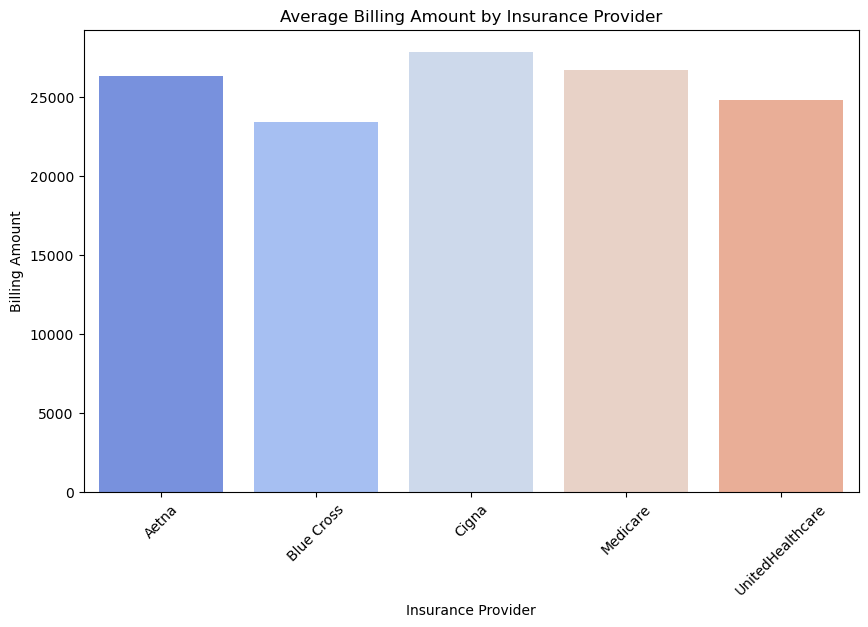

In [99]:
# What is the average billing amount for different insurance providers?
# Bar Chart for average billing amount by insurance provider
plt.figure(figsize=(10, 6))
avg_billing_by_insurance = admission_df.groupby('Insurance Provider')['Billing Amount'].mean().reset_index()
sns.barplot(x='Insurance Provider', y='Billing Amount', data=avg_billing_by_insurance)
plt.title('Average Billing Amount by Insurance Provider')
plt.xticks(rotation=45)
plt.show()